# **Cantidad pedida**

In [ ]:
import numpy as np
import pandas as pd

In [ ]:
data = pd.read_excel("/content/drive/MyDrive/Modelos de inventarios.xlsx",sheet_name="EOQ_descuento")
data

,D,K,c1,c2,h,q,L,cantidad_pedido,reorden
0,396,505,11.44,9.25,0.03,875,22,3778,1154
1,811,230,17.60,9.63,0.43,723,11,931,535
2,822,57,13.06,6.86,0.47,207,2,446,305
3,59,552,19.49,4.00,0.14,513,20,688,491
4,519,230,14.54,1.83,0.42,118,8,753,384
...,...,...,...,...,...,...,...,...,...
95,125,66,12.71,4.31,0.30,266,24,266,168
96,63,411,12.50,7.21,0.35,993,8,993,120
97,662,382,13.06,7.82,0.43,779,11,1087,754
98,861,533,18.09,8.03,0.08,298,16,3387,227


In [ ]:
data = data.dropna()

In [ ]:
features = np.asarray(data[["D",	"K",	"c1",	"c2",	"h",	"q",	"L"]])
targets = np.asarray(data["cantidad_pedido"])

In [ ]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import KFold
k = 5
kf = KFold(n_splits = k, shuffle = True)
d_tree = DecisionTreeRegressor(max_depth= 50)

In [ ]:
# declarar un array para los precios predichos en cada iteración

all_predictions = np.zeros_like(targets)

for train_indices, test_indices in kf.split(features):
  train_features, test_features = features[train_indices], features[test_indices]
  train_targets, test_targets = targets[train_indices] , targets[test_indices]

  ## Entrenar el decision tree
  d_tree.fit(train_features,train_targets)

  ## Predecir usando el modelo
  predictions = d_tree.predict(test_features)

  ## Ponemos las predicciones en el array de all_predictions creado above
  all_predictions[test_indices] = predictions


## Evaluamos el modelo usando la diferencia de medianas de todas las predicciones realizadas
eval_model = np.median(np.abs(all_predictions - targets))
eval_model

230.0

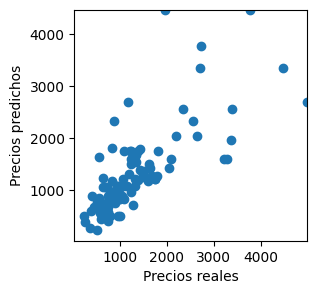

In [ ]:
from matplotlib import pyplot as plt
plt.figure(figsize = (3,3))
plt.scatter(targets, all_predictions)
plt.xlim(30,targets.max())
plt.ylim(30,predictions.max())
plt.xlabel("Precios reales")
plt.ylabel("Precios predichos")
plt.show()

In [ ]:
test_features

array([[8.110e+02, 2.300e+02, 1.760e+01, 9.630e+00, 4.300e-01, 7.230e+02,
        1.100e+01],
       [8.660e+02, 4.880e+02, 1.525e+01, 1.280e+00, 4.300e-01, 3.780e+02,
        2.900e+01],
       [8.910e+02, 8.500e+01, 1.938e+01, 1.090e+00, 4.800e-01, 3.750e+02,
        3.000e+00],
       [2.130e+02, 5.130e+02, 1.139e+01, 2.350e+00, 3.500e-01, 7.190e+02,
        2.200e+01],
       [9.740e+02, 1.130e+02, 1.626e+01, 7.280e+00, 3.900e-01, 5.320e+02,
        4.000e+00],
       [9.200e+02, 5.560e+02, 1.476e+01, 9.650e+00, 4.000e-02, 1.460e+02,
        8.000e+00],
       [6.280e+02, 3.770e+02, 1.703e+01, 1.800e+00, 2.100e-01, 2.780e+02,
        3.000e+00],
       [6.620e+02, 2.170e+02, 1.368e+01, 2.130e+00, 1.100e-01, 4.730e+02,
        2.000e+00],
       [2.150e+02, 4.230e+02, 1.600e+01, 3.190e+00, 3.800e-01, 8.600e+02,
        2.000e+01],
       [7.660e+02, 5.530e+02, 1.650e+01, 2.210e+00, 3.800e-01, 5.550e+02,
        8.000e+00],
       [8.530e+02, 1.040e+02, 1.282e+01, 1.890e+00, 5.000e-0

In [ ]:
cop = d_tree.predict([[683,	510,	6.39,	5.88,	0.23,	431,	3]])

In [ ]:
cop

array([1610.])

# **Punto reorden**

In [ ]:
import numpy as np
import pandas as pd

In [ ]:
data = pd.read_excel("/content/drive/MyDrive/Modelos de inventarios.xlsx",sheet_name="EOQ_descuento")
data

,D,K,c1,c2,h,q,L,cantidad_pedido,reorden
0,396,505,11.44,9.25,0.03,875,22,3778,1154
1,811,230,17.60,9.63,0.43,723,11,931,535
2,822,57,13.06,6.86,0.47,207,2,446,305
3,59,552,19.49,4.00,0.14,513,20,688,491
4,519,230,14.54,1.83,0.42,118,8,753,384
...,...,...,...,...,...,...,...,...,...
95,125,66,12.71,4.31,0.30,266,24,266,168
96,63,411,12.50,7.21,0.35,993,8,993,120
97,662,382,13.06,7.82,0.43,779,11,1087,754
98,861,533,18.09,8.03,0.08,298,16,3387,227


In [ ]:
data = data.dropna()

In [ ]:
features = np.asarray(data[["D",	"K",	"c1",	"c2",	"h",	"q",	"L"]])
targets = np.asarray(data["reorden"])

In [ ]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import KFold
k = 5
kf = KFold(n_splits = k, shuffle = True)
d_tree = DecisionTreeRegressor(max_depth= 50)

In [ ]:
# declarar un array para los precios predichos en cada iteración

all_predictions = np.zeros_like(targets)

for train_indices, test_indices in kf.split(features):
  train_features, test_features = features[train_indices], features[test_indices]
  train_targets, test_targets = targets[train_indices] , targets[test_indices]

  ## Entrenar el decision tree
  d_tree.fit(train_features,train_targets)

  ## Predecir usando el modelo
  predictions = d_tree.predict(test_features)

  ## Ponemos las predicciones en el array de all_predictions creado above
  all_predictions[test_indices] = predictions


## Evaluamos el modelo usando la diferencia de medianas de todas las predicciones realizadas
eval_model = np.median(np.abs(all_predictions - targets))
eval_model

322.0

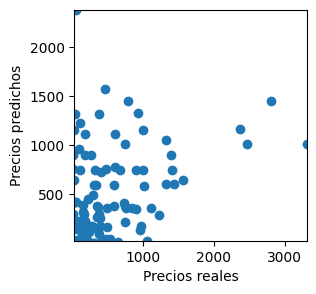

In [ ]:
from matplotlib import pyplot as plt
plt.figure(figsize = (3,3))
plt.scatter(targets, all_predictions)
plt.xlim(30,targets.max())
plt.ylim(30,predictions.max())
plt.xlabel("Precios reales")
plt.ylabel("Precios predichos")
plt.show()

In [ ]:
test_features

array([[8.220e+02, 5.700e+01, 1.306e+01, 6.860e+00, 4.700e-01, 2.070e+02,
        2.000e+00],
       [8.830e+02, 3.310e+02, 1.914e+01, 7.500e+00, 3.300e-01, 7.410e+02,
        1.000e+01],
       [1.040e+02, 5.170e+02, 1.959e+01, 8.400e+00, 3.100e-01, 8.280e+02,
        1.500e+01],
       [6.500e+02, 1.240e+02, 1.612e+01, 5.480e+00, 2.700e-01, 9.350e+02,
        1.500e+01],
       [6.670e+02, 4.990e+02, 1.908e+01, 4.910e+00, 6.000e-02, 2.430e+02,
        5.000e+00],
       [1.270e+02, 3.800e+02, 1.602e+01, 4.150e+00, 4.600e-01, 7.410e+02,
        9.000e+00],
       [6.700e+01, 2.050e+02, 1.232e+01, 7.700e+00, 2.200e-01, 3.890e+02,
        3.000e+01],
       [7.360e+02, 2.010e+02, 1.505e+01, 6.100e+00, 1.900e-01, 9.030e+02,
        4.000e+00],
       [2.000e+02, 5.780e+02, 1.817e+01, 5.690e+00, 2.900e-01, 2.820e+02,
        5.000e+00],
       [3.480e+02, 4.880e+02, 1.402e+01, 8.760e+00, 1.700e-01, 3.500e+02,
        1.300e+01],
       [8.790e+02, 3.210e+02, 1.509e+01, 6.020e+00, 1.800e-0

In [ ]:
cop = d_tree.predict([[683,	510,	6.39,	5.88,	0.23,	431,	3]])

In [ ]:
cop

array([595.])